<a href="https://colab.research.google.com/github/satyavenkat2011/PRODIGY_ML_05/blob/main/food_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
from shutil import copy
from shutil import copytree, rmtree
from tensorflow import keras
import keras.backend as K
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from keras import regularizers
from keras.applications.inception_v3 import InceptionV3
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, CSVLogger
from keras.optimizers import SGD
from keras.regularizers import l2
from tensorflow import keras
from keras import models
import cv2

In [3]:
# Check if GPU is enabled
print(tf.__version__)
print(tf.test.gpu_device_name())

2.17.0



In [4]:
def get_data_extract():
  if "food-101" in os.listdir():
    print("Dataset already exists")
  else:
    print("Downloading the data...")
    !wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
    print("Dataset downloaded!")
    print("Extracting data..")
    !tar xzvf food-101.tar.gz
    print("Extraction done!")

In [5]:
get_data_extract()

Dataset already exists


In [9]:
directory_path = 'food-101'

contents = os.listdir(directory_path)

for item in contents:
    print(item)


.DS_Store
images
license_agreement.txt
meta
prepared_data
README.txt
test
train


In [10]:
os.listdir('food-101/images')

['.DS_Store',
 'apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisq

In [11]:
os.listdir('food-101/meta')

['classes.txt',
 'labels.txt',
 'test',
 'test.json',
 'test.txt',
 'train',
 'train.json',
 'train.txt']

In [17]:
file_path = r'food-101/meta/train.txt'

with open(file_path, 'r') as file:
    contents = file.readlines()

for line in contents:
    print(line.strip())


apple_pie/1005649
apple_pie/1014775
apple_pie/1026328
apple_pie/1028787
apple_pie/1043283
apple_pie/1050519
apple_pie/1057749
apple_pie/1057810
apple_pie/1072416
apple_pie/1074856
apple_pie/1074942
apple_pie/1076891
apple_pie/1077610
apple_pie/1077964
apple_pie/1088809
apple_pie/1097378
apple_pie/1103795
apple_pie/1109597
apple_pie/1111062
apple_pie/1112300
apple_pie/1112838
apple_pie/1121884
apple_pie/112378
apple_pie/1133267
apple_pie/1142597
apple_pie/1147371
apple_pie/1154371
apple_pie/1158360
apple_pie/1159801
apple_pie/1165004
apple_pie/1166116
apple_pie/1166210
apple_pie/116697
apple_pie/1174241
apple_pie/1174949
apple_pie/1177254
apple_pie/118237
apple_pie/1184568
apple_pie/1185445
apple_pie/1185654
apple_pie/1191665
apple_pie/1196628
apple_pie/1199851
apple_pie/1200079
apple_pie/1214326
apple_pie/1215650
apple_pie/1218767
apple_pie/1220194
apple_pie/1230465
apple_pie/1232311
apple_pie/123782
apple_pie/1239205
apple_pie/1240585
apple_pie/1246460
apple_pie/1246552
apple_pie/1252

prime_rib/59675
prime_rib/610111
prime_rib/611293
prime_rib/615039
prime_rib/617216
prime_rib/620613
prime_rib/62084
prime_rib/62622
prime_rib/638420
prime_rib/643627
prime_rib/644122
prime_rib/644225
prime_rib/644876
prime_rib/648013
prime_rib/656263
prime_rib/65685
prime_rib/658212
prime_rib/66533
prime_rib/671893
prime_rib/676905
prime_rib/680463
prime_rib/680470
prime_rib/685069
prime_rib/686449
prime_rib/687448
prime_rib/689346
prime_rib/691860
prime_rib/691863
prime_rib/692709
prime_rib/69328
prime_rib/695918
prime_rib/697742
prime_rib/70456
prime_rib/704745
prime_rib/705077
prime_rib/705331
prime_rib/707729
prime_rib/708325
prime_rib/715146
prime_rib/721232
prime_rib/721245
prime_rib/741587
prime_rib/744483
prime_rib/746716
prime_rib/747744
prime_rib/754707
prime_rib/755225
prime_rib/757300
prime_rib/76271
prime_rib/76464
prime_rib/76466
prime_rib/767552
prime_rib/777681
prime_rib/797076
prime_rib/801491
prime_rib/804343
prime_rib/810895
prime_rib/811245
prime_rib/8119
prime_rib

In [18]:
file_path = r'food-101/meta/classes.txt'

with open(file_path, 'r') as file:
    contents = file.readlines()

for line in contents:
    print(line.strip())

apple_pie
baby_back_ribs
baklava
beef_carpaccio
beef_tartare
beet_salad
beignets
bibimbap
bread_pudding
breakfast_burrito
bruschetta
caesar_salad
cannoli
caprese_salad
carrot_cake
ceviche
cheesecake
cheese_plate
chicken_curry
chicken_quesadilla
chicken_wings
chocolate_cake
chocolate_mousse
churros
clam_chowder
club_sandwich
crab_cakes
creme_brulee
croque_madame
cup_cakes
deviled_eggs
donuts
dumplings
edamame
eggs_benedict
escargots
falafel
filet_mignon
fish_and_chips
foie_gras
french_fries
french_onion_soup
french_toast
fried_calamari
fried_rice
frozen_yogurt
garlic_bread
gnocchi
greek_salad
grilled_cheese_sandwich
grilled_salmon
guacamole
gyoza
hamburger
hot_and_sour_soup
hot_dog
huevos_rancheros
hummus
ice_cream
lasagna
lobster_bisque
lobster_roll_sandwich
macaroni_and_cheese
macarons
miso_soup
mussels
nachos
omelette
onion_rings
oysters
pad_thai
paella
pancakes
panna_cotta
peking_duck
pho
pizza
pork_chop
poutine
prime_rib
pulled_pork_sandwich
ramen
ravioli
red_velvet_cake
risotto
sa

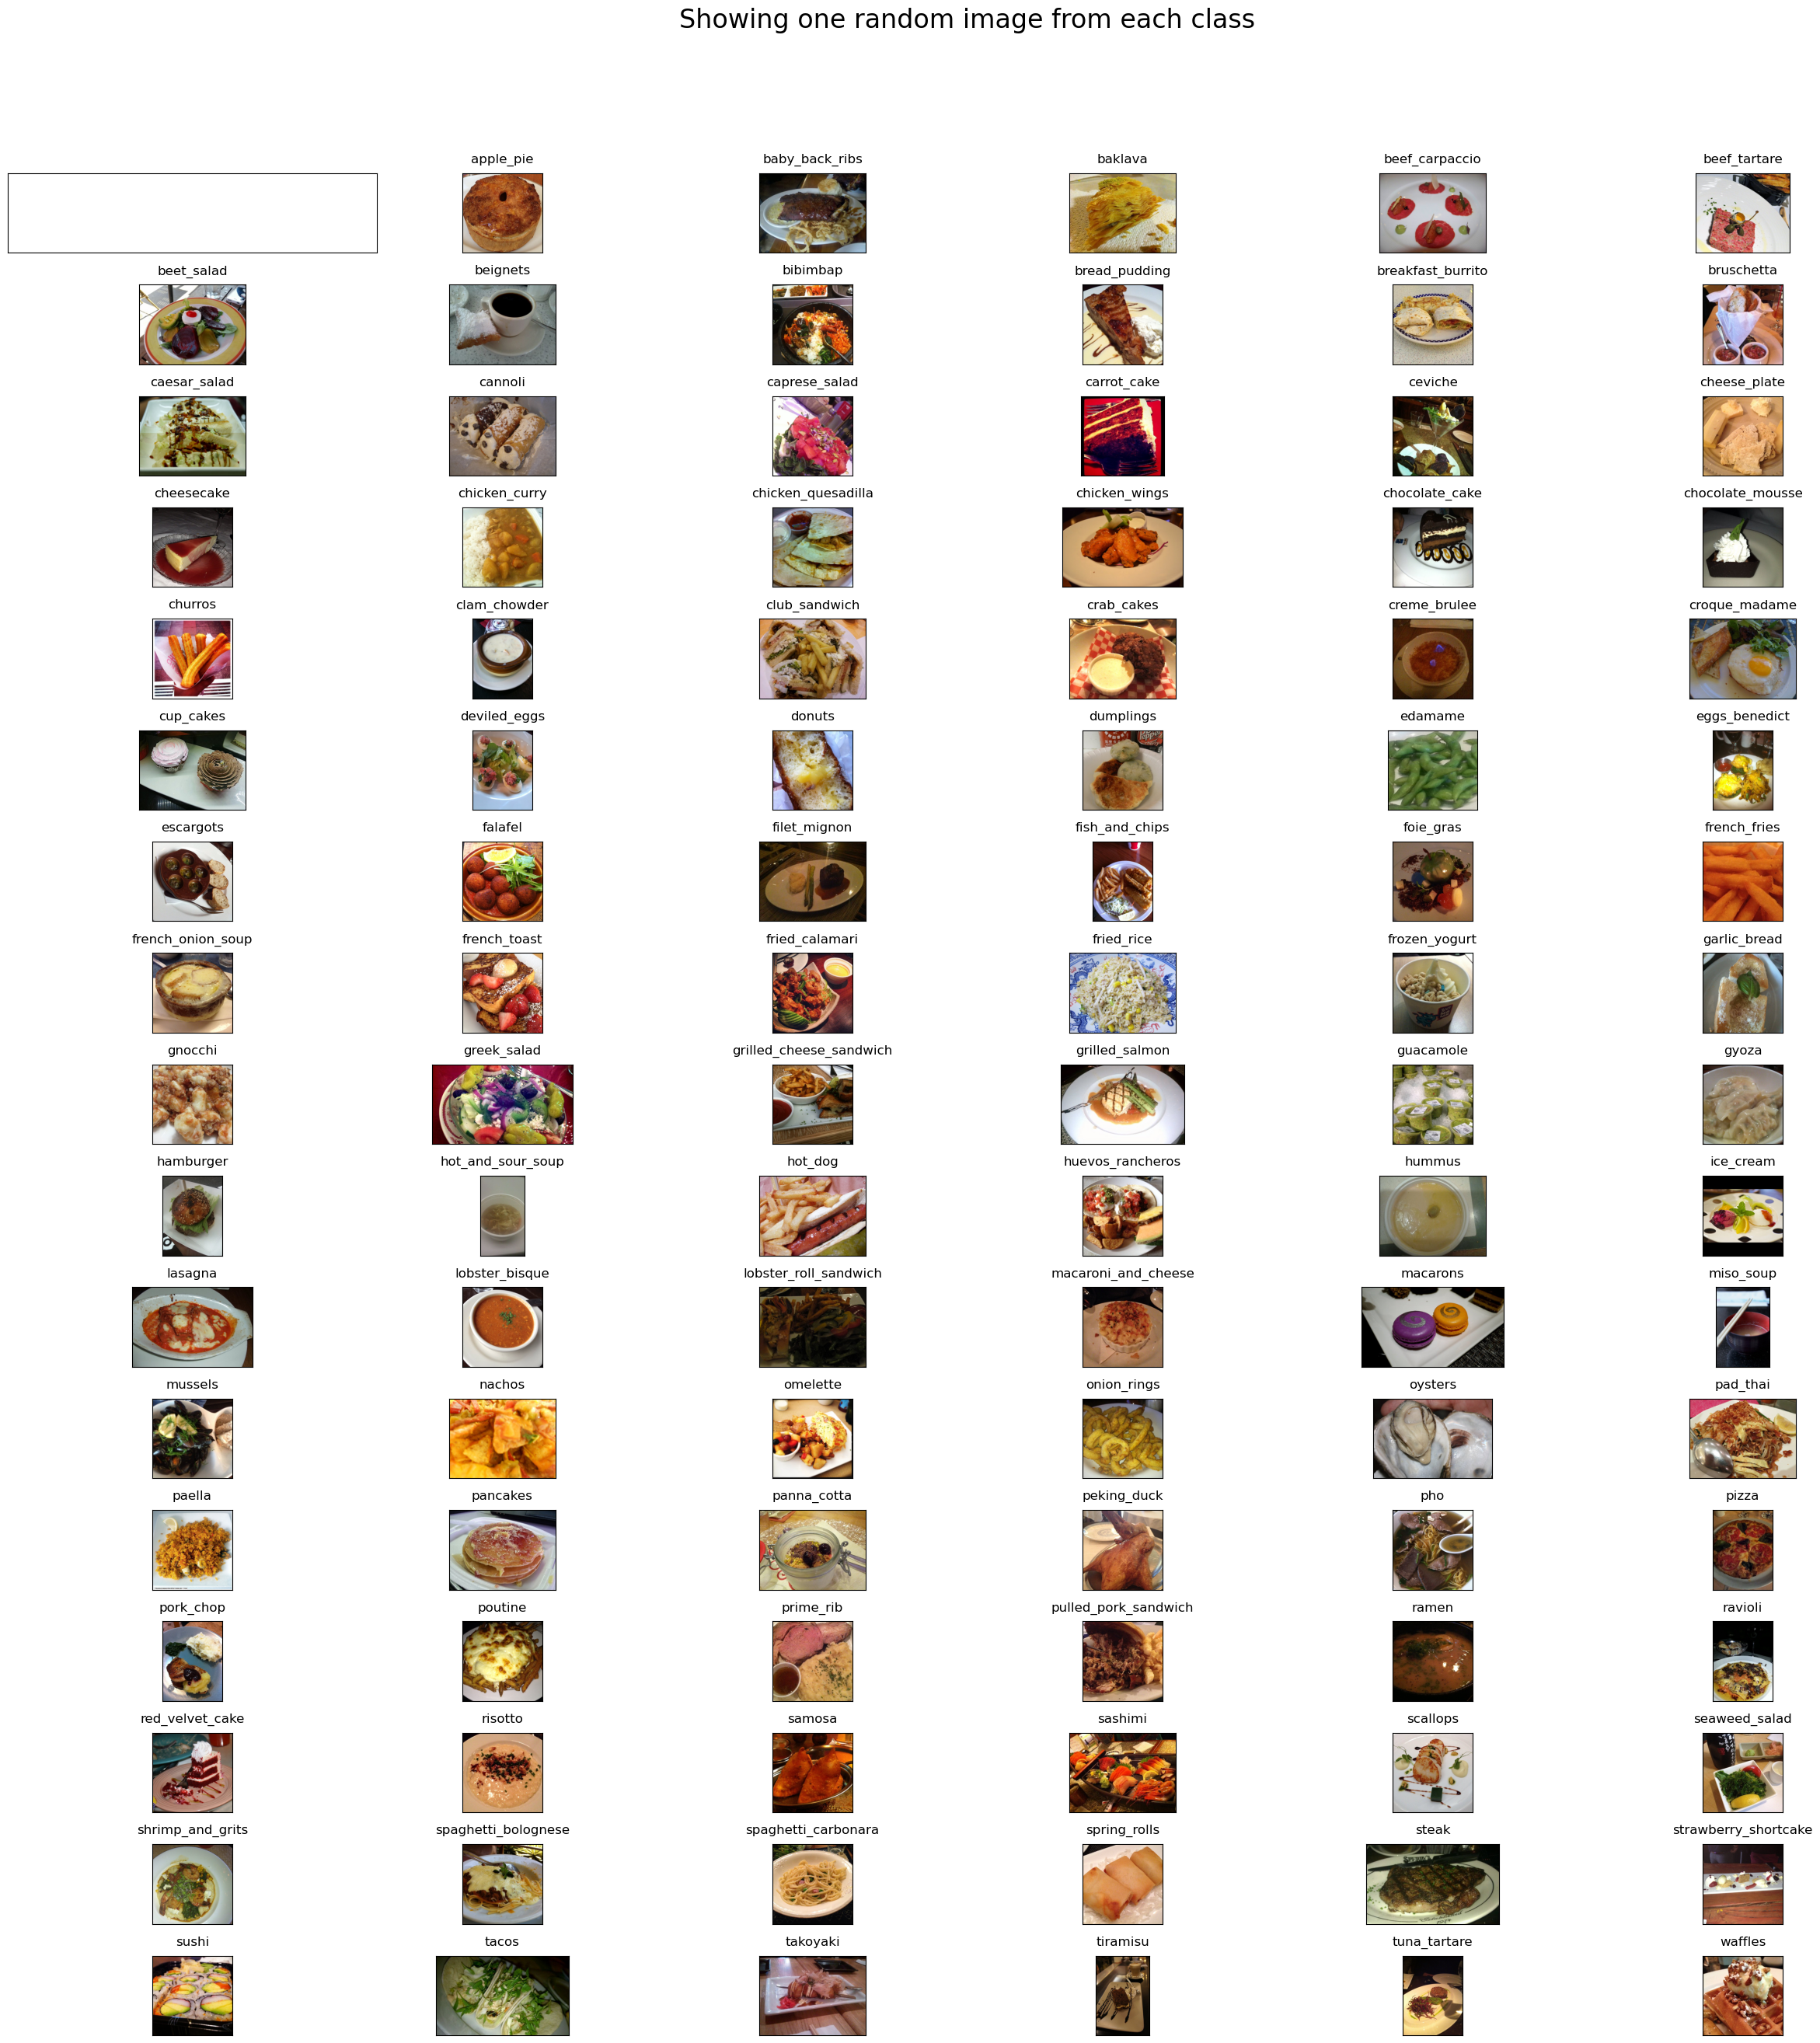

In [19]:
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) 
data_dir = "food-101/images/"
foods_sorted = sorted(os.listdir(data_dir))
food_id = 0
for i in range(rows):
  for j in range(cols):
    try:
      food_selected = foods_sorted[food_id]
      food_id += 1
    except:
      break
    if food_selected == '.DS_Store':
        continue
    food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) 
    food_selected_random = np.random.choice(food_selected_images) 
    img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(food_selected, pad = 10)

plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()

In [20]:
def prepare_data(filepath, src,dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")

In [43]:
print("Creating train data...")
prepare_data('C:/Users/20106/Downloads/food-101/meta/train.txt', 'C:/Users/20106/Downloads/food-101/images', 'train')


Creating train data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying im

In [44]:
print("Total number of samples in train folder")

directory_path = 'train'

count = 0

for root, dirs, files in os.walk(directory_path):
    count += len(dirs) + len(files)

print(count)


Total number of samples in train folder
75851


In [25]:
print("Total number of samples in test folder")
directory_path = 'test'

count = 0

for root, dirs, files in os.walk(directory_path):
    count += len(dirs) + len(files)

print(count)

Total number of samples in test folder
0


In [56]:
print("Creating test data...")
prepare_data('C:/Users/20106/Downloads/food-101/meta/test.txt', 'C:/Users/20106/Downloads/food-101/images', 'test')

Creating test data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying ima

In [57]:
print("Total number of samples in test folder")
count = 0

for root, dirs, files in os.walk(directory_path):
    count += len(dirs) + len(files)

print(count)

Total number of samples in test folder
25351


In [46]:
os.chdir('/')

In [47]:
del foods_sorted[0] 

In [48]:
foods_sorted

['baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster_roll_sandwich

In [49]:
def dataset_mini(food_list, src, dest):
  if os.path.exists(dest):
    rmtree(dest) 
  os.makedirs(dest)
  for food_item in food_list :
    print("Copying images into",food_item)
    copytree(os.path.join(src,food_item), os.path.join(dest,food_item))

In [58]:
food_list = ['apple_pie','pizza','omelette']
src_train = 'C:/Users/20106/Downloads/train'
dest_train = 'train_mini/'
src_test = 'C:/Users/20106/Downloads/test'
dest_test = 'test_mini/'

In [59]:
print("Creating train data folder with new classes")
dataset_mini(food_list, src_train, dest_train)

Creating train data folder with new classes
Copying images into apple_pie
Copying images into pizza
Copying images into omelette


In [60]:
print("Total number of samples in train folder")

directory_path = 'C:/Users/20106/Downloads/train'
count = 0

for root, dirs, files in os.walk(directory_path):
    count += len(dirs) + len(files)

print(count)


Total number of samples in train folder
100854


In [61]:
print("Creating test data folder with new classes")
dataset_mini(food_list, src_test, dest_test)

Creating test data folder with new classes
Copying images into apple_pie
Copying images into pizza
Copying images into omelette


In [62]:
print("Total number of samples in test folder")

directory_path = 'C:/Users/20106/Downloads/test'
count = 0

for root, dirs, files in os.walk(directory_path):
    count += len(dirs) + len(files)
    
print(count)

Total number of samples in test folder
25351


In [75]:
from keras.applications.resnet50 import ResNet50
n.//mB<

K.clear_session()

# Parameters
n_classes = 3
img_width, img_height = 224, 224
train_data_dir = 'train_mini'
validation_data_dir = 'test_mini'
nb_train_samples = 2250
nb_validation_samples = 750
batch_size = 16

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

# Model
resnet50 = ResNet50(weights='imagenet', include_top=False)
x = resnet50.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(n_classes, kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=resnet50.input, outputs=predictions)

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

log_dir = 'training_logs'
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

# Callbacks
checkpointer = ModelCheckpoint(filepath=os.path.join(log_dir, 'best_model_3class.keras'), verbose=1, save_best_only=True)
csv_logger = CSVLogger(os.path.join(log_dir, 'history_3class.log'))

# Fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    epochs=30,
    verbose=1,
    callbacks=[csv_logger, checkpointer]
)

# Save the final model
model.save(os.path.join(log_dir, 'my_model.keras'))


Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
Epoch 1/30


C:\Users\20106\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.4708 - loss: 1.0855
Epoch 1: val_loss improved from inf to 1.89013, saving model to training_logs\best_model_3class.keras
140/140 ━━━━━━━━━━━━━━━━━━━━ 1016s 7s/step - accuracy: 0.4713 - loss: 1.0847 - val_accuracy: 0.3302 - val_loss: 1.8901
Epoch 2/30
  1/140 ━━━━━━━━━━━━━━━━━━━━ 14:16 6s/step - accuracy: 0.7500 - loss: 0.7405

C:\Users\20106\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss improved from 1.89013 to 1.43585, saving model to training_logs\best_model_3class.keras
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.7500 - loss: 0.7405 - val_accuracy: 0.5000 - val_loss: 1.4359
Epoch 3/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7087 - loss: 0.7537
Epoch 3: val_loss did not improve from 1.43585
140/140 ━━━━━━━━━━━━━━━━━━━━ 978s 7s/step - accuracy: 0.7088 - loss: 0.7534 - val_accuracy: 0.3315 - val_loss: 2.5129
Epoch 4/30
  1/140 ━━━━━━━━━━━━━━━━━━━━ 14:44 6s/step - accuracy: 0.6250 - loss: 0.7427
Epoch 4: val_loss did not improve from 1.43585
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6250 - loss: 0.7427 - val_accuracy: 0.4286 - val_loss: 2.0540
Epoch 5/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.7689 - loss: 0.6053
Epoch 5: val_loss did not improve from 1.43585
140/140 ━━━━━━━━━━━━━━━━━━━━ 1411s 10s/step - accuracy: 0.7689 - loss: 0.6052 - val_accuracy: 0.3356 - val_loss: 2.1043
Epoch 6/30
  1/140 

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.9341 - loss: 0.2130
Epoch 27: val_loss did not improve from 0.15211
140/140 ━━━━━━━━━━━━━━━━━━━━ 1416s 10s/step - accuracy: 0.9341 - loss: 0.2130 - val_accuracy: 0.9239 - val_loss: 0.2331
Epoch 28/30
  1/140 ━━━━━━━━━━━━━━━━━━━━ 19:26 8s/step - accuracy: 0.8750 - loss: 0.3211
Epoch 28: val_loss did not improve from 0.15211
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.8750 - loss: 0.3211 - val_accuracy: 0.8571 - val_loss: 0.2584
Epoch 29/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.9402 - loss: 0.2159
Epoch 29: val_loss did not improve from 0.15211
140/140 ━━━━━━━━━━━━━━━━━━━━ 1342s 10s/step - accuracy: 0.9402 - loss: 0.2159 - val_accuracy: 0.9266 - val_loss: 0.2189
Epoch 30/30
  1/140 ━━━━━━━━━━━━━━━━━━━━ 22:47 10s/step - accuracy: 1.0000 - loss: 0.0811
Epoch 30: val_loss did not improve from 0.15211
140/140 ━━━━━━━━━━━━━━━━━━━━ 31s 152ms/step - accuracy: 1.0000 - loss: 0.0811 - val_accuracy: 0.7857 - val_los

In [76]:
class_map_3 = train_generator.class_indices
class_map_3

{'apple_pie': 0, 'omelette': 1, 'pizza': 2}

In [79]:
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()

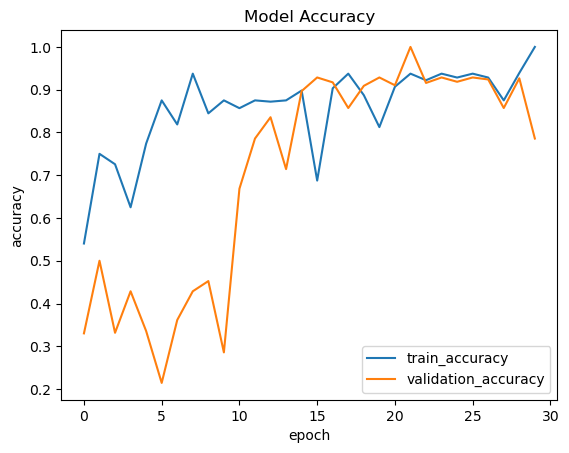

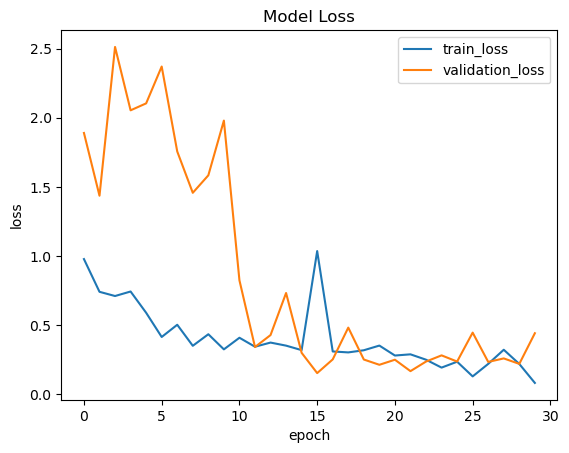

In [80]:
plot_accuracy(history, 'Model Accuracy')
plot_loss(history, 'Model Loss')

In [82]:
def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.

    pred = model.predict(img)
    index = np.argmax(pred)
    food_list.sort()
    pred_value = food_list[index]
    if show:
        plt.imshow(img[0])
        plt.axis('off')
        plt.title(pred_value)
        plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


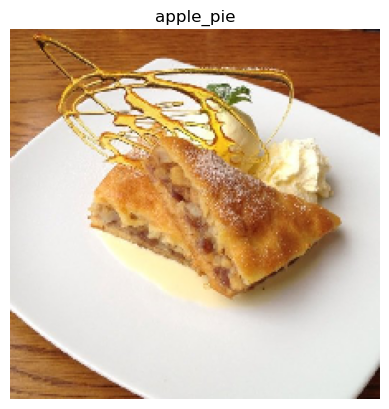

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


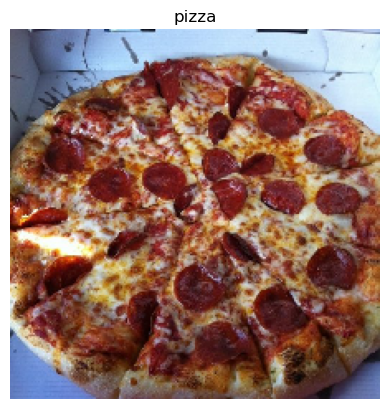

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


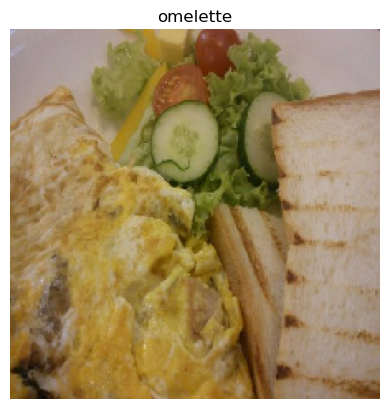

In [85]:
images = []
images.append('C:/Users/20106/Downloads/test/apple_pie/1167170.jpg')
images.append('C:/Users/20106/Downloads/test/pizza/1001116.jpg')
images.append('C:/Users/20106/Downloads/test/omelette/1019294.jpg')
predict_class(model, images, True)

In [99]:
# Sample calorie data for the given labels
calories_dict = {
    'Apple pie': 320,
    'Baby back ribs': 420,
    'Baklava': 330,
    'Beef carpaccio': 150,
    'Beef tartare': 200,
    'Beet salad': 180,
    'Beignets': 310,
    'Bibimbap': 500,
    'Bread pudding': 350,
    'Breakfast burrito': 700,
    'Bruschetta': 200,
    'Caesar salad': 300,
    'Cannoli': 270,
    'Caprese salad': 250,
    'Carrot cake': 350,
    'Ceviche': 220,
    'Cheesecake': 400,
    'Cheese plate': 450,
    'Chicken curry': 600,
    'Chicken quesadilla': 650,
    'Chicken wings': 400,
    'Chocolate cake': 350,
    'Chocolate mousse': 330,
    'Churros': 250,
    'Clam chowder': 300,
    'Club sandwich': 700,
    'Crab cakes': 300,
    'Creme brulee': 500,
    'Croque madame': 600,
    'Cup cakes': 280,
    'Deviled eggs': 150,
    'Donuts': 250,
    'Dumplings': 200,
    'Edamame': 120,
    'Eggs benedict': 450,
    'Escargots': 120,
    'Falafel': 300,
    'Filet mignon': 500,
    'Fish and chips': 800,
    'Foie gras': 450,
    'French fries': 350,
    'French onion soup': 300,
    'French toast': 350,
    'Fried calamari': 400,
    'Fried rice': 400,
    'Frozen yogurt': 150,
    'Garlic bread': 200,
    'Gnocchi': 300,
    'Greek salad': 200,
    'Grilled cheese sandwich': 400,
    'Grilled salmon': 350,
    'Guacamole': 200,
    'Gyoza': 250,
    'Hamburger': 700,
    'Hot and sour soup': 150,
    'Hot dog': 250,
    'Huevos rancheros': 500,
    'Hummus': 150,
    'Ice cream': 200,
    'Lasagna': 600,
    'Lobster bisque': 300,
    'Lobster roll sandwich': 600,
    'Macaroni and cheese': 500,
    'Macarons': 100,
    'Miso soup': 60,
    'Mussels': 200,
    'Nachos': 500,
    'Omelette': 250,
    'Onion rings': 400,
    'Oysters': 70,
    'Pad thai': 600,
    'Paella': 700,
    'Pancakes': 350,
    'Panna cotta': 300,
    'Peking duck': 500,
    'Pho': 400,
    'Pizza': 285,  # This can vary greatly depending on toppings
    'Pork chop': 350,
    'Poutine': 700,
    'Prime rib': 600,
    'Pulled pork sandwich': 600,
    'Ramen': 450,
    'Ravioli': 400,
    'Red velvet cake': 350,
    'Risotto': 400,
    'Samosa': 300,
    'Sashimi': 100,
    'Scallops': 200,
    'Seaweed salad': 100,
    'Shrimp and grits': 450,
    'Spaghetti bolognese': 600,
    'Spaghetti carbonara': 700,
    'Spring rolls': 150,
    'Steak': 500,
    'Strawberry shortcake': 350,
    'Sushi': 200,
    'Tacos': 200,
    'Takoyaki': 250,
    'Tiramisu': 400,
    'Tuna tartare': 150,
    'Waffles': 350
}

food_labels = [
    'Apple pie', 'Baby back ribs', 'Baklava', 'Beef carpaccio', 'Beef tartare', 'Beet salad', 
    'Beignets', 'Bibimbap', 'Bread pudding', 'Breakfast burrito', 'Bruschetta', 'Caesar salad', 
    'Cannoli', 'Caprese salad', 'Carrot cake', 'Ceviche', 'Cheesecake', 'Cheese plate', 
    'Chicken curry', 'Chicken quesadilla', 'Chicken wings', 'Chocolate cake', 'Chocolate mousse', 
    'Churros', 'Clam chowder', 'Club sandwich', 'Crab cakes', 'Creme brulee', 'Croque madame', 
    'Cup cakes', 'Deviled eggs', 'Donuts', 'Dumplings', 'Edamame', 'Eggs benedict', 
    'Escargots', 'Falafel', 'Filet mignon', 'Fish and chips', 'Foie gras', 'French fries', 
    'French onion soup', 'French toast', 'Fried calamari', 'Fried rice', 'Frozen yogurt', 
    'Garlic bread', 'Gnocchi', 'Greek salad', 'Grilled cheese sandwich', 'Grilled salmon', 
    'Guacamole', 'Gyoza', 'Hamburger', 'Hot and sour soup', 'Hot dog', 'Huevos rancheros', 
    'Hummus', 'Ice cream', 'Lasagna', 'Lobster bisque', 'Lobster roll sandwich', 
    'Macaroni and cheese', 'Macarons', 'Miso soup', 'Mussels', 'Nachos', 'Omelette', 
    'Onion rings', 'Oysters', 'Pad thai', 'Paella', 'Pancakes', 'Panna cotta', 'Peking duck', 
    'Pho', 'Pizza', 'Pork chop', 'Poutine', 'Prime rib', 'Pulled pork sandwich', 'Ramen', 
    'Ravioli', 'Red velvet cake', 'Risotto', 'Samosa', 'Sashimi', 'Scallops', 'Seaweed salad', 
    'Shrimp and grits', 'Spaghetti bolognese', 'Spaghetti carbonara', 'Spring rolls', 'Steak', 
    'Strawberry shortcake', 'Sushi', 'Tacos', 'Takoyaki', 'Tiramisu', 'Tuna tartare', 'Waffles'
]

calories_list = [calories_dict.get(label, "Unknown") for label in food_labels]

print(calories_list)


[320, 420, 330, 150, 200, 180, 310, 500, 350, 700, 200, 300, 270, 250, 350, 220, 400, 450, 600, 650, 400, 350, 330, 250, 300, 700, 300, 500, 600, 280, 150, 250, 200, 120, 450, 120, 300, 500, 800, 450, 350, 300, 350, 400, 400, 150, 200, 300, 200, 400, 350, 200, 250, 700, 150, 250, 500, 150, 200, 600, 300, 600, 500, 100, 60, 200, 500, 250, 400, 70, 600, 700, 350, 300, 500, 400, 285, 350, 700, 600, 600, 450, 400, 350, 400, 300, 100, 200, 100, 450, 600, 700, 150, 500, 350, 200, 200, 250, 400, 150, 350]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
The food item is: Apple pie
Estimated calories: 320


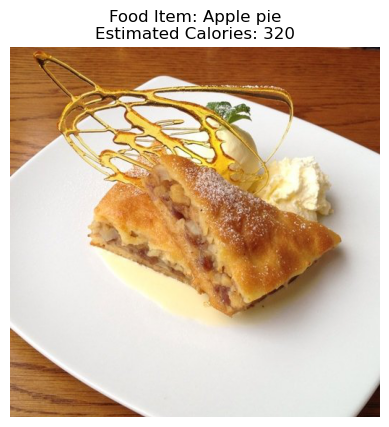

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
The food item is: Baklava
Estimated calories: 330


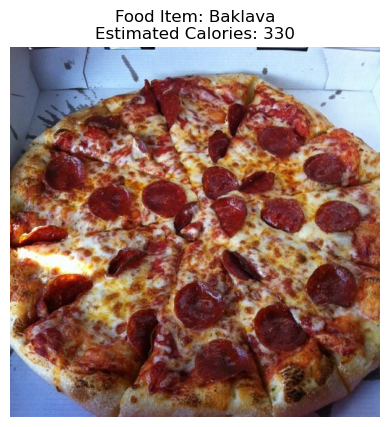

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
The food item is: Baby back ribs
Estimated calories: 420


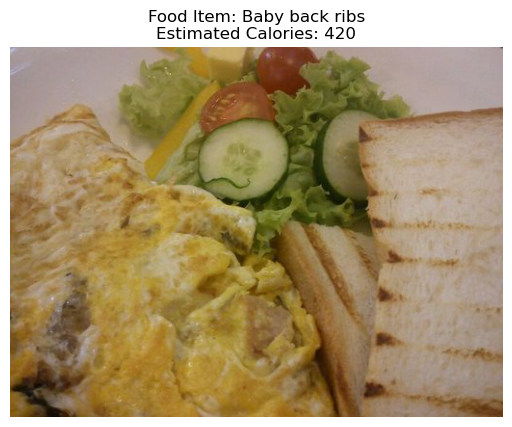

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def preprocess_image(image_path, target_size=(224, 224)):
    img = load_img(image_path, target_size=target_size)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  
    return img

def predict_food(image_path):
    processed_image = preprocess_image(image_path)
    prediction = model.predict(processed_image)
    predicted_class = np.argmax(prediction, axis=1)[0]
    return predicted_class

path = r"C:\Users\20106\Downloads\food-101\meta\labels.txt"

class_labels = []

with open(path, 'r') as file:
    for line in file:
        label = line.strip()
        class_labels.append(label)

def get_calories(food_item):
    return calories_dict.get(food_item, "Unknown")

def calculate_calories(image_path):
    predicted_class = predict_food(image_path)
    food_item = class_labels[predicted_class]
    calories = get_calories(food_item)
    return food_item, calories

def display_image_with_info(image_path, food_item, calories):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.title(f'Food Item: {food_item}\nEstimated Calories: {calories}')
    plt.axis('off')  
    plt.show()

for image_path in images:
    food_item, calories = calculate_calories(image_path)
    print(f'The food item is: {food_item}')
    print(f'Estimated calories: {calories}')
    display_image_with_info(image_path, food_item, calories)
